# Multinomial Regression with Multiple Variable


In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper parameters
learning_rate = 1
training_epochs = 1000
display_step = 50

## Dataset

Our dataset a wire resistance table from a chip for 20nm process node. 
It is a 2D array of wire-length, wire-width, temperature and wire-resistance.
We'll use wire length and wire resistance as our dataset for linear regression example.


|Wire-length | Wire-width  | Temperature | Resistance
|------------|-------------|-------------|-------------
|(meters)    | (meters)    | (degree C)  | (Ohm)
|3.806e-06   | 1.088e-07   | 79.0494     | 52.897 
|4.307e-06   | 7.517e-08   | 56.2845     | 83.904 
|4.158e-06   | 1.135e-07   | 27.0643     | 52.517 
|5.416e-06   | 8.939e-08   | 42.0784     | 85.435 
|6.274e-06   | 9.090e-08   | 55.5829     | 110.85 
|8.215e-06   | 1.199e-07   | 97.4032     | 119.45
|6.437e-06   | 6.653e-08   | 75.0783     | 148.11 
|2.823e-06   | 1.028e-07   | 2.48765     | 36.138 
|2.015e-06   | 1.293e-07   | 63.5732     | 22.955 
|6.346e-06   | 6.420e-08   | 77.0031     | 145.52 
|5.008e-06   | 1.047e-07   | 105.656     | 79.024 



In [3]:
#Load dataset
datafile = os.path.join('..','data','res.tbl.gz')
dataset = np.loadtxt(datafile, dtype=np.float32, ndmin=2)
# reduce the dataset for quick experiments
#dataset = dataset[0:300,:]

## Normalization
Since our length values are very small (in microns) and resistance values range from tens to hundreds, it is **very important** normalize the dataset right after loading.

In [4]:
# normalize the dataset between 0 and 1.
data_min = np.min(dataset, axis=0)
data_max = np.max(dataset, axis=0)

def normalize(d, min, max):
    return (d-min)/(max-min)

def denormalize(d, min, max):
    return ((max-min)*d) + min

dataset = normalize(dataset, data_min, data_max)
np.random.shuffle(dataset)

## Divide the dataset
into training dataset and validation dataset

In [5]:
# training dataset percentage is 80%
def divide_dataset(dataset):
    train_pct = 0.8; 
    # divide dataset into training and validation set
    train_index = int(dataset.shape[0]*train_pct)
    t_X = dataset[:train_index,0:3]
    t_Y = dataset[:train_index,3]
    v_X = dataset[train_index:,0:3]
    v_Y = dataset[train_index:,3]
    
    return t_X, t_Y, v_X, v_Y

train_X, train_Y, valid_X, valid_Y = divide_dataset(dataset)
n_samples = train_X.shape[0]

## Declare Graph Variables

Place to declare plave holders and variables for compute graph

In [6]:
# tf Graph Input
X1 = tf.placeholder("float")
X2 = tf.placeholder("float")
X3 = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W1  = tf.Variable(0.405, name="weight1")
W21 = tf.Variable(-0.466, name="weight21")
W22 = tf.Variable(-0.015, name="weight22")
W3  = tf.Variable(0.189, name="weight3")
b   = tf.Variable(0.16, name="bias")


## Compute Graph
Construct a multivariate polynomial model

In [7]:
predicted = W1*X1 + W21*X2 + W22*X2*X2 + W3*X3 + b

## Cost function and Optimizer

In [8]:
# Mean squared error
cost = tf.reduce_sum((predicted-Y)*(predicted-Y))/(2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Train the Model

In [9]:
# Prepare data
tX1 = train_X[:,0]
tX2 = train_X[:,1]
tX3 = train_X[:,2]
vX1 = valid_X[:,0]
vX2 = valid_X[:,1]
vX3 = valid_X[:,2]

In [10]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X1:tX1, X2:tX2, X3:tX3, Y:train_Y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X1:tX1, X2:tX2, X3:tX3, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W1=", sess.run(W1), "W21=", sess.run(W21), "W22=", sess.run(W22), "W3=", sess.run(W3),"b=", sess.run(b))

    print( "Optimization Finished!" )

    # Find cost on training and validation dataset.
    training_cost = sess.run(cost, feed_dict={X1:tX1, X2:tX2, X3:tX3, Y:train_Y})
    print ("Training   cost (mean sq. error) =",training_cost, "W1=", sess.run(W1), "W21=", sess.run(W21), "W22=", sess.run(W22), "W3=", sess.run(W3), "b=", sess.run(b))
    validation_cost = sess.run(cost, feed_dict={X1:vX1, X2:vX2, X3:vX3, Y:valid_Y})
    print ("Validation cost (mean sq. error) =",validation_cost, '\n')
    
    # Record the mode before closing the session
    Weight1  = sess.run(W1)
    Weight21 = sess.run(W21)
    Weight22 = sess.run(W22)
    Weight3  = sess.run(W3)
    Bias   = sess.run(b)

Epoch: 0050 cost= 0.000485705 W1= 0.406121 W21= -0.465759 W22= 0.00674802 W3= 0.188506 b= 0.161895
Epoch: 0100 cost= 0.000480903 W1= 0.406654 W21= -0.474192 W22= 0.0196525 W3= 0.18825 b= 0.162501
Epoch: 0150 cost= 0.000476514 W1= 0.407208 W21= -0.484063 W22= 0.0305499 W3= 0.188414 b= 0.164182
Epoch: 0200 cost= 0.000472263 W1= 0.40757 W21= -0.494196 W22= 0.0408174 W3= 0.188572 b= 0.166265
Epoch: 0250 cost= 0.000468120 W1= 0.407781 W21= -0.504304 W22= 0.0508108 W3= 0.188666 b= 0.168515
Epoch: 0300 cost= 0.000464079 W1= 0.407898 W21= -0.514316 W22= 0.0606301 W3= 0.188708 b= 0.170834
Epoch: 0350 cost= 0.000460137 W1= 0.407962 W21= -0.524215 W22= 0.0703078 W3= 0.188718 b= 0.173176
Epoch: 0400 cost= 0.000456290 W1= 0.407995 W21= -0.533996 W22= 0.0798572 W3= 0.188709 b= 0.175517
Epoch: 0450 cost= 0.000452537 W1= 0.408012 W21= -0.54366 W22= 0.0892849 W3= 0.188688 b= 0.177845
Epoch: 0500 cost= 0.000448875 W1= 0.40802 W21= -0.553207 W22= 0.0985949 W3= 0.188662 b= 0.180154
Epoch: 0550 cost= 0.000

# Denormalize


In [11]:
# Formulate your trained model as a matrix before denormalization
def PolyModel(x1, x2, x3):
    return Weight1*x1 + Weight21*x2 + Weight22*x2*x2 + Weight3*x3 + Bias

fX = PolyModel(tX1, tX2, tX3)

# Formulate your trained model as a matrix
trained_model = denormalize(fX, data_min[3], data_max[3])

# De normalize dataset
train_X, train_Y, valid_X, valid_Y = divide_dataset(denormalize(dataset, data_min, data_max))

# separate variables for graphical display
tX1 = train_X[:,0]
tX2 = train_X[:,1]
tX3 = train_X[:,2]
vX1 = valid_X[:,0]
vX2 = valid_X[:,1]
vX3 = valid_X[:,2]

# Plot Model with Dataset

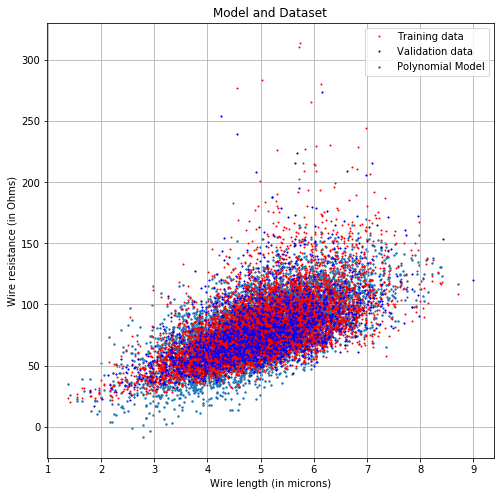

In [12]:
#Graphic display
plt.figure(figsize=(8,8))
plt.title('Model and Dataset')
plt.xlabel('Wire length (in microns)')
plt.ylabel('Wire resistance (in Ohms)')
plt.grid()
plt.plot(tX1*1e6, train_Y, 'ro', label='Training data', marker='o', markersize=1)
plt.plot(vX1*1e6, valid_Y, 'bo', label='Validation data', marker='D', markersize=1)
plt.scatter(train_X[:,0]*1e6, trained_model, label='Polynomial Model', s=2)
plt.legend()
plt.show()

# Predict Resistance Values 

In [13]:
def predictResistance(length, width, temperature):
    l = normalize(length,      data_min[0], data_max[0])
    w = normalize(width,       data_min[1], data_max[1])
    t = normalize(temperature, data_min[2], data_max[2])
    poly_model = Weight1*l + Weight21*w + Weight22*w*w + Weight3*t + Bias
    return denormalize(poly_model,data_min[3], data_max[3])

# convert values shows in the table at the top into quads.
res_tbl = [ [3.806e-06, 1.088e-07, 79.0494, 52.897],
            [4.307e-06, 7.517e-08, 56.2845, 83.904],
            [4.158e-06, 1.135e-07, 27.0643, 52.517],
            [5.416e-06, 8.939e-08, 42.0784, 85.435],
            [6.274e-06, 9.090e-08, 55.5829, 110.85],
            [8.215e-06, 1.199e-07, 97.4032, 119.45],
            [6.437e-06, 6.653e-08, 75.0783, 148.11],
            [2.823e-06, 1.028e-07, 2.48765, 36.138],
            [2.015e-06, 1.293e-07, 63.5732, 22.955],
            [6.346e-06, 6.420e-08, 77.0031, 145.52],
            [5.008e-06, 1.047e-07, 105.656, 79.024] ]

for quad in res_tbl:
    predicted_resistance = predictResistance(quad[0], quad[1], quad[2])
    print( "Wire length = ", quad[0], ", Predicted Resistance = ", 
          predicted_resistance, ", Actual Resistance =", quad[3],
         ". Diff=", quad[3]-predicted_resistance)

Wire length =  3.806e-06 , Predicted Resistance =  57.658108061 , Actual Resistance = 52.897 . Diff= -4.76110806098
Wire length =  4.307e-06 , Predicted Resistance =  88.8520947628 , Actual Resistance = 83.904 . Diff= -4.94809476282
Wire length =  4.158e-06 , Predicted Resistance =  43.6416703302 , Actual Resistance = 52.517 . Diff= 8.8753296698
Wire length =  5.416e-06 , Predicted Resistance =  88.8353663396 , Actual Resistance = 85.435 . Diff= -3.40036633958
Wire length =  6.274e-06 , Predicted Resistance =  105.241582499 , Actual Resistance = 110.85 . Diff= 5.60841750121
Wire length =  8.215e-06 , Predicted Resistance =  124.614834914 , Actual Resistance = 119.45 . Diff= -5.16483491373
Wire length =  6.437e-06 , Predicted Resistance =  137.046088925 , Actual Resistance = 148.11 . Diff= 11.063911075
Wire length =  2.823e-06 , Predicted Resistance =  23.725241245 , Actual Resistance = 36.138 . Diff= 12.412758755
Wire length =  2.015e-06 , Predicted Resistance =  8.52445928963 , Actual

# Error Distribution

In [14]:
def sampleError(sampleData, goldData):
    sampleData = predictResistance(sampleData[:,0], sampleData[:,1], sampleData[:,2])
    error = (goldData-sampleData)/goldData
    return error

training_Error   = sampleError(train_X, train_Y)
validation_Error = sampleError(valid_X, valid_Y)

print('Training   error mean=', np.mean(training_Error),   ' and distribution=', np.std(training_Error))
print('Validation error mean=', np.mean(validation_Error), ' and distribution=', np.std(validation_Error))

Training   error mean= -0.00139939  and distribution= 0.105866
Validation error mean= -0.00312649  and distribution= 0.114474


# Plot Error

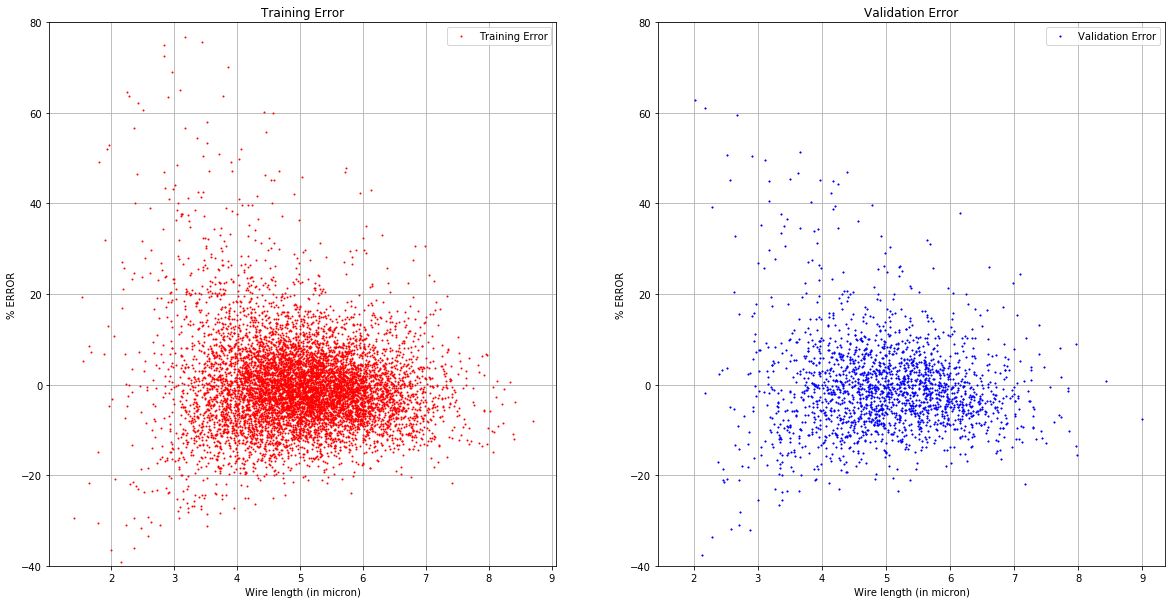

In [15]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(train_X[:,0]*1e6, 100*training_Error, 'ro', label='Training Error', marker='o', markersize=1)
plt.title('Training Error')
plt.xlabel('Wire length (in micron)')
plt.ylabel('% ERROR')
plt.ylim(-40, 80)
plt.legend()


plt.subplot(1, 2, 2)
plt.grid()
plt.plot(valid_X[:,0]*1e6, 100*validation_Error, 'bo', label='Validation Error', marker='D', markersize=1)
plt.title('Validation Error')
plt.xlabel('Wire length (in micron)')
plt.ylabel('% ERROR')
plt.ylim(-40, 80)
plt.legend()

plt.show()

# 4D Scatter Plots
Plot 4D scatter plots for training and validation with polnomial model as a surface. 
Surface predicts the points for data. All the data points are supposed to be on the
model surface perfect model.
Color of the points represents 4th dimension. 


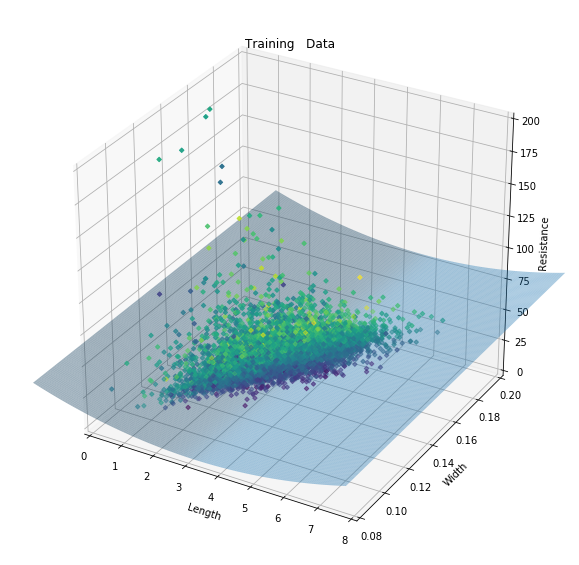

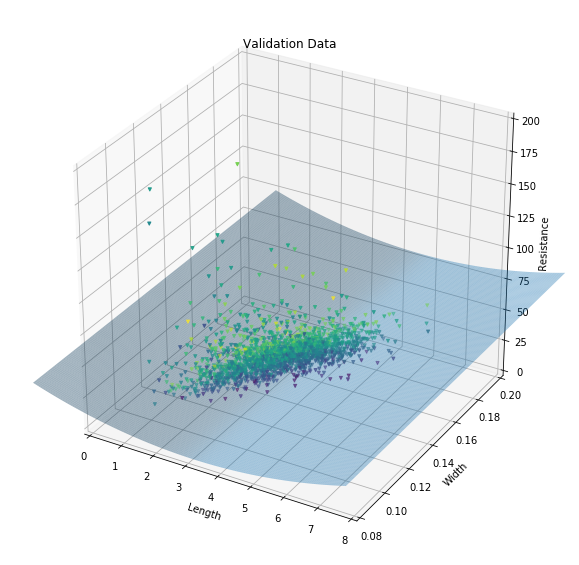

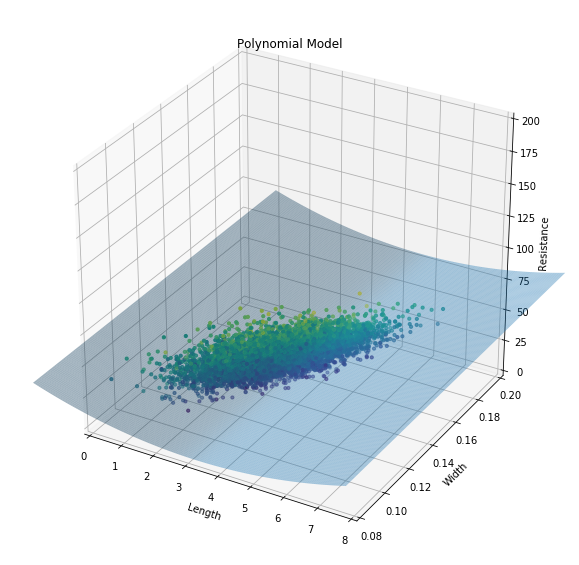

In [16]:
# 4D plot. Here temperate is represented as color temperature in 
# the 3D plot of length/width as x/y axis and resistance as Z axis.

from mpl_toolkits.mplot3d import Axes3D

def fourDPlot(t, X, Y, Z, c, m):
    fig = plt.figure(figsize=(10,10))

    ax = fig.gca(projection='3d')

    ax.scatter(X, Y, Z, c=c, marker=m, s=10)

    ax.set_title(t)
    ax.set_xlabel('Length')
    ax.set_ylabel('Width')
    ax.set_zlabel('Resistance')
    ax.set_xlim(0, 8)
    ax.set_ylim(8e-2, 2e-1)
    ax.set_zlim(0, 200)
    
    # Draw poly model on top of data.
    length_range = np.arange(1,10,0.05)
    width_range  = np.arange(0.02, 0.2, 0.001)
    lgrid, wgrid = np.meshgrid(length_range, width_range)
    sorted_model = np.zeros(length_range.shape)
    temperature = normalize(63.5, data_min[2], data_max[2])
    i=0
    for x1, x2 in zip(length_range, width_range):
        model_value = PolyModel(normalize(x1*1e-6, data_min[0], data_max[0]), 
                                normalize(x2*1e-6, data_min[1], data_max[1]), 
                                temperature)
        sorted_model[i] = denormalize(model_value, data_min[3], data_max[3])
        i=i+1

    surf = ax.plot_surface(lgrid, wgrid, sorted_model, rstride=1, cstride=1, alpha=0.4)

    plt.show()
    
fourDPlot('Training   Data', tX1*1e6, tX2*1e6, train_Y,        tX3, 'D')
fourDPlot('Validation Data', vX1*1e6, vX2*1e6, valid_Y,        vX3, 'v')
fourDPlot('Polynomial Model', tX1*1e6, tX2*1e6, trained_model, tX3, 'o')
